In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from pandas.plotting import register_matplotlib_converters 
from statsmodels.tsa.seasonal import STL

In [2]:
path = "household_power_consumption.txt"
df = pd.read_csv(path,delimiter=";",dtype="str")

#Combine date and time
df["datetime"] = pd.to_datetime(df["Date"]+" "+df["Time"])
#Convert other columns to numeric
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"],errors="coerce")
df["Global_reactive_power"] = pd.to_numeric(df["Global_reactive_power"],errors="coerce")
df["Voltage"] = pd.to_numeric(df["Voltage"],errors="coerce")
df["Global_intensity"] = pd.to_numeric(df["Global_intensity"],errors="coerce")
df["Sub_metering_1"] = pd.to_numeric(df["Sub_metering_1"],errors="coerce")
df["Sub_metering_2"] = pd.to_numeric(df["Sub_metering_2"],errors="coerce")
df["Sub_metering_3"] = pd.to_numeric(df["Sub_metering_3"],errors="coerce")

#Mark nan-rows
df["nan_rows"] = 0
df.loc[df.isna().any(axis=1),"nan_rows"] = 1
#Timestamp rounded to floor hour

df["timestamp"] = df["datetime"].dt.floor("H")

df.head()

C:\Users\valta\AppData\Local\Temp\ipykernel_11592\3791000578.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["datetime"] = pd.to_datetime(df["Date"]+" "+df["Time"])
C:\Users\valta\AppData\Local\Temp\ipykernel_11592\3791000578.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["timestamp"] = df["datetime"].dt.floor("H")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,nan_rows,timestamp
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,0,2006-12-16 17:00:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,0,2006-12-16 17:00:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,0,2006-12-16 17:00:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,0,2006-12-16 17:00:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,0,2006-12-16 17:00:00


In [3]:
df.set_index("datetime", inplace=True)
df.sort_index(inplace=True)

C:\Users\valta\AppData\Local\Temp\ipykernel_11592\3625705084.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  y = df["Global_active_power"].resample("H").mean().interpolate("time").dropna()


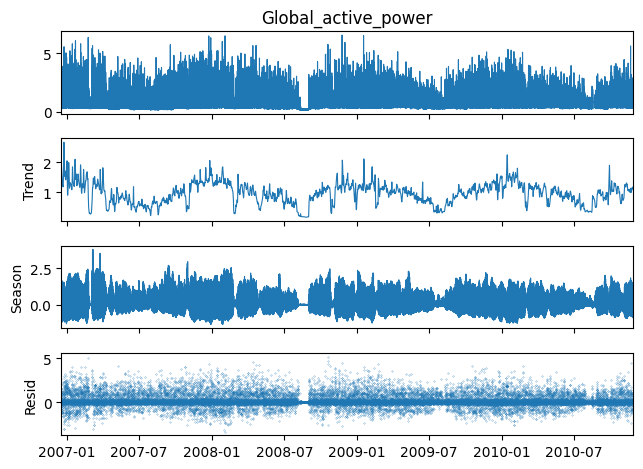

In [5]:
y = df["Global_active_power"].resample("H").mean().interpolate("time").dropna() 
# STL 
stl = STL(y, period=24, robust=True) 
res = stl.fit() 
fig = res.plot()
for ax in fig.axes:
    for line in ax.get_lines():
        line.set_linewidth(0.8)      # ohuempi viiva
        line.set_markersize(0.2)       # pienemmät pisteet
plt.tight_layout()
plt.show()